In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the data

X_train = np.loadtxt("data/seconds_0.2_overlap_0.1/data_Train.txt")
y_train = np.loadtxt("labels/seconds_0.2_overlap_0.1/labels_Train.txt")

X_val = np.loadtxt("data/seconds_0.2_overlap_0.1/data_Validation.txt")
y_val = np.loadtxt("labels/seconds_0.2_overlap_0.1/labels_Validation.txt")

X_test = np.loadtxt("data/seconds_0.2_overlap_0.1/data_Test.txt")
y_test = np.loadtxt("labels/seconds_0.2_overlap_0.1/labels_Test.txt")

In [3]:

X_train = X_train.astype("float32")/255.0
X_test = X_test.astype("float32")/255.0
X_val = X_val.astype("float32")/255.0

In [4]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

width = X_train.shape[1]

(28419072, 9)
(7087488, 9)
(7125504, 9)


In [5]:
X_train = X_train.reshape((-1, 128, width))
X_val = X_val.reshape((-1, 128, width))
X_test = X_test.reshape((-1, 128, width))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(222024, 128, 9)
(55371, 128, 9)
(55668, 128, 9)


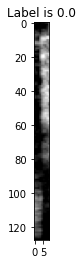

In [6]:
index = 16000

plt.imshow(X_train[index], cmap ="gray")
plt.title(f"Label is {y_train[index]}")
plt.show()

In [7]:
# resizing images

#data_padded = [data[i] for i in range(0, data.shape[0])]

#n_samples = data.shape[0]
#height = data.shape[1]
#width = data.shape[2]


#for i in range(0, n_samples):
#    for j in range(width, height):
#        data_padded[i] = np.append(data_padded[i], [[0] for k in range(0, height)], 1)
    
#data_padded = np.array(data_padded)
#data_padded.shape
#data = data_padded

In [8]:
X_train = X_train.reshape((-1, 128, width, 1))
X_val = X_val.reshape((-1, 128, width, 1))
X_test = X_test.reshape((-1, 128, width, 1))

In [9]:
# train test split
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

(array([110340.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 111684.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

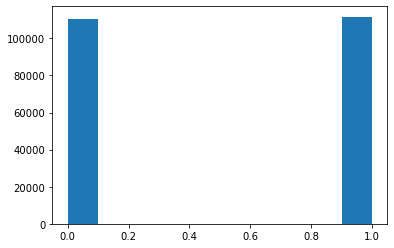

In [10]:
from matplotlib import pyplot as plt

plt.hist(y_train)

In [11]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(12, (3, 3),
                        strides=1,
                        activation="relu",
                        input_shape=(128, width, 1)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))


model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="accuracy"
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 7, 12)        120       
_________________________________________________________________
dropout (Dropout)            (None, 126, 7, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10584)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10585     
Total params: 10,705
Trainable params: 10,705
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=512,
    validation_data=(X_val, y_val),
)

Epoch 1/15
434/434 [==============================] - 19s 43ms/step - loss: 0.3096 - accuracy: 0.8831 - val_loss: 0.2294 - val_accuracy: 0.9174
Epoch 2/15
434/434 [==============================] - 18s 43ms/step - loss: 0.1750 - accuracy: 0.9388 - val_loss: 0.1728 - val_accuracy: 0.9365
Epoch 3/15
434/434 [==============================] - 18s 43ms/step - loss: 0.1405 - accuracy: 0.9510 - val_loss: 0.1340 - val_accuracy: 0.9420
Epoch 4/15
434/434 [==============================] - 19s 43ms/step - loss: 0.1174 - accuracy: 0.9593 - val_loss: 0.1149 - val_accuracy: 0.9504
Epoch 5/15
434/434 [==============================] - 20s 46ms/step - loss: 0.0992 - accuracy: 0.9656 - val_loss: 0.1250 - val_accuracy: 0.9499
Epoch 6/15
434/434 [==============================] - 19s 44ms/step - loss: 0.0863 - accuracy: 0.9706 - val_loss: 0.1016 - val_accuracy: 0.9559
Epoch 7/15
434/434 [==============================] - 19s 43ms/step - loss: 0.0773 - accuracy: 0.9736 - val_loss: 0.0968 - val_accuracy:

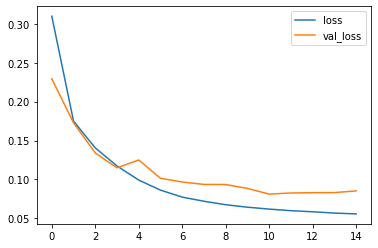

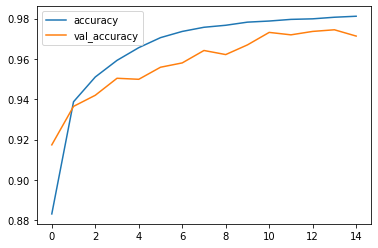

In [13]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

In [14]:
model.save('first_model.h5')

In [15]:
test_audio = np.loadtxt("data/for_prediction/Olaf_Schubert/seconds_0.2_overlap_0/Olaf_Schubert_1/data.txt")
test_audio_2 = np.loadtxt("data/for_prediction/Andrew_Ng/seconds_0.2_overlap_0/Andrew_Ng_3/data.txt")

In [16]:
test_audio_3 = np.loadtxt("data/for_prediction/Recording/seconds_0.2_overlap_0/Recording_1/data.txt")

In [17]:
test_audio_3 = test_audio_3.reshape((-1, 128, width, 1))
test_audio_3 = test_audio_3.astype("float32")/255.0

In [18]:
predictions_3 = model.predict(
    test_audio_3)
mask_3 = (predictions_3 > 0.1)
sum(mask_3)/len(mask_3)

array([0.64322917])

In [19]:
test_audio = test_audio.reshape((-1, 128, width, 1))
test_audio_2 = test_audio_2.reshape((-1, 128, width, 1))

In [20]:
test_audio = test_audio.astype("float32")/255.0
test_audio_2 = test_audio.astype("float32")/255.0

In [21]:
predictions = model.predict(
    test_audio)
predictions_2 = model.predict(
    test_audio_2)

In [24]:
mask_2 = (predictions_2 > 0.5)
mask = (predictions > 0.5)

In [29]:
import time
time.sleep(5)
for i, b in enumerate(mask):
    if b:
        print(i*0.2)
    time.sleep(0.2)

17.900000000000002
44.5
62.2
65.0
68.7
129.0
142.70000000000002
146.8
147.1


KeyboardInterrupt: 

In [ ]:
predictions

In [ ]:
mask = (predictions > 0.05)

In [ ]:
plt.plot(mask)[mask]

In [30]:
np.arange(5181)[mask.reshape(-1)]/The 5

SyntaxError: invalid syntax (<ipython-input-30-663f0626662c>, line 1)

In [ ]:
mask.shape

In [ ]:
preds = model.predict(X_test)

In [ ]:
sum((preds > 0.1) & (preds < 0.9))

In [ ]:
test_audio[0].flatten()

In [ ]:
X_test[0]

In [26]:
test_audio.shape

(5181, 128, 9, 1)

In [27]:
X_train.shape

(222024, 128, 9, 1)